# Convergence of RK methods

We consider the IVP $u'=\sin[(u+t)^2]$ over $0\le t \le 4$, with $u(0)=-1$.

In [6]:
using FundamentalsNumericalComputation

In [10]:
f = (u,p,t) -> sin((t+u)^2)
tspan = (0.0,4.0)
u0 = -1.0

ivp = ODEProblem(f,u0,tspan)

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 4.0)
u0: -1.0

We use a `DifferentialEquations` solver to construct an accurate approximation to the exact solution.

In [11]:
u_exact = solve(ivp,reltol=1e-14,abstol=1e-14);

Now we perform a convergence study of our two Runge--Kutta implementations.

In [12]:
n = @. 50*2^(0:5)
err_IE2 = zeros(size(n))
err_RK4 = zeros(size(n))
for (j,n) = enumerate(n)
    t,u = FNC.ie2(ivp,n)
    err_IE2[j] = maximum( @.abs(u_exact(t)-u) )
    t,u = FNC.rk4(ivp,n)
    err_RK4[j] = maximum( @.abs(u_exact(t)-u) )
end

@show err_IE2;
@show err_RK4;

err_IE2 = [0.0035378425225620624, 0.0008914149361759494, 0.00022241872374195726, 5.556591874722461e-5, 1.3887596434614125e-5, 3.4715876663371503e-6]
err_RK4 = [2.0723246294873654e-5, 1.244395664956599e-6, 7.60655465281701e-8, 4.702223665997707e-9, 2.921813901934911e-10, 1.8208046181911186e-11]


The amount of computational work at each time step is assumed to be proportional to the number of stages. Let's compare on an apples-to-apples basis by using the number of $f$-evaluations on the horizontal axis.

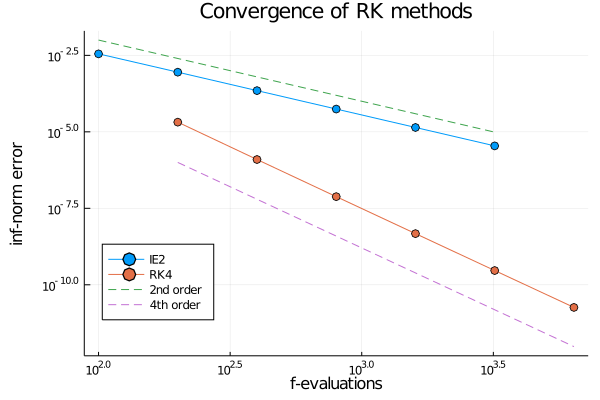

In [13]:
using Plots
plot([2n 4n],[err_IE2 err_RK4],m=:o,label=["IE2" "RK4"],
    xaxis=(:log10,"f-evaluations"),yaxis=(:log10,"inf-norm error"),
    title="Convergence of RK methods",leg=:bottomleft)

plot!(2n,0.01*(n/n[1]).^(-2),l=:dash,label="2nd order")
plot!(4n,1e-6*(n/n[1]).^(-4),l=:dash,label="4th order")

The fourth-order variant is more efficient in this problem over a wide range of accuracy.